##  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(101)

## loading dataset

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dict_live = {
    0:'died',
    1:'survived'
}
dict_sex = {
    'male':0,
    'female':1
}

data['Bsex']=data['Sex'].apply(lambda x : dict_sex[x])

#features
features = data[['Pclass','Bsex']].to_numpy()
labels = data[['Survived']].to_numpy()


## Splliting the data

In [5]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(features , labels , test_size = 0.30, random_state = 0)

## Multi - layer perceptron

#### Activation function and Derivative

In [6]:
# sigmoid 

def Sigmoid(x , derivative = False):
    
    if derivative == True:
        f = 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))
    else:
        f = 1/(1 + np.exp(-x))
    
    return f

def ReLu(x , derivative = False):
    if derivative == True:
        f = np.heaviside(x , 1)
    else:
        f = np.maximum(x,0)
    
    return f

In [7]:
xtrain.shape

(623, 2)

## Training model

In [8]:
def train_ann(xtrain , ytrain , h1_units = 4 , h2_units = 4 ,learning_rate = 0.0015):
    
    random.seed(101)
    
    #hidden layer 1
    w1 = 2*np.random.rand(h1_units , xtrain.shape[1])
    b1 = np.random.rand(h1_units)
    
    #hidden layer 2
    w2 = 2*np.random.rand(h2_units , h1_units)
    b2 = np.random.rand(h2_units)
    
    # output layer 
    w_out = 2*np.random.rand(h2_units)
    b_out = np.random.rand(1)
    
    loss =[]
    ver_y =[]
    
    for i in range(0 , xtrain.shape[0]):
        x_data = xtrain[i]
        
        #2. feed forward
        
        h1 = ReLu(np.dot(w1 , x_data) + b1) #hidden layer 1 output
        h2 = ReLu(np.dot(w2 , h1) + b2)#hidden layer 2 output
        y = Sigmoid(np.dot(w_out , h2) + b_out)#output of output layer
        
        #3. Backpropagation - calculation the layer derivatives
        delta_out = (y - ytrain[i]) * Sigmoid(y , derivative = True)
        delta_2 = delta_out * w_out *ReLu(h2 , derivative = True)
        delta_1 = np.dot(delta_2 , w2) *ReLu(h1 , derivative = True)
        
        #4. Gradient Descent
        w_out = w_out - learning_rate * delta_out * h2 #output layer
        b_out = b_out - learning_rate *delta_out
        
        #hidden layer 2 
        w2 = w2 - learning_rate * np.kron(delta_2 , h1).reshape(h2_units , h1_units)
        b2 = b2 - learning_rate * delta_2
        
        #hidden layer 1 
        w1 = w1 - learning_rate * np.kron(delta_1 , x_data).reshape(h1_units , x_data.shape[0])
        b1 = b1 - learning_rate * delta_1
        
        #cost
        loss.append((1/2) * (y - ytrain[i]**2))
        ver_y.append(y[0])
        
    batch_loss = []
    for i in range(0 , 10):
        loss_avg = 0
        for m in range(0 , 60):
            loss_avg +=ver_y[60*i +m]/60
        batch_loss.append(loss_avg)
    plt.figure(figsize =(10,6))
    plt.plot(np.arange(1 ,len(batch_loss)+1) , batch_loss)
    plt.title('avg loss by epoch' , fontsize = 20)
    plt.xlabel('Epoch',fontsize = 16) 
    plt.ylabel('Loss',fontsize=16)
    plt.show()
    
    return w1 , b1 , w2 , b2 , w_out , b_out , loss
        
        
        

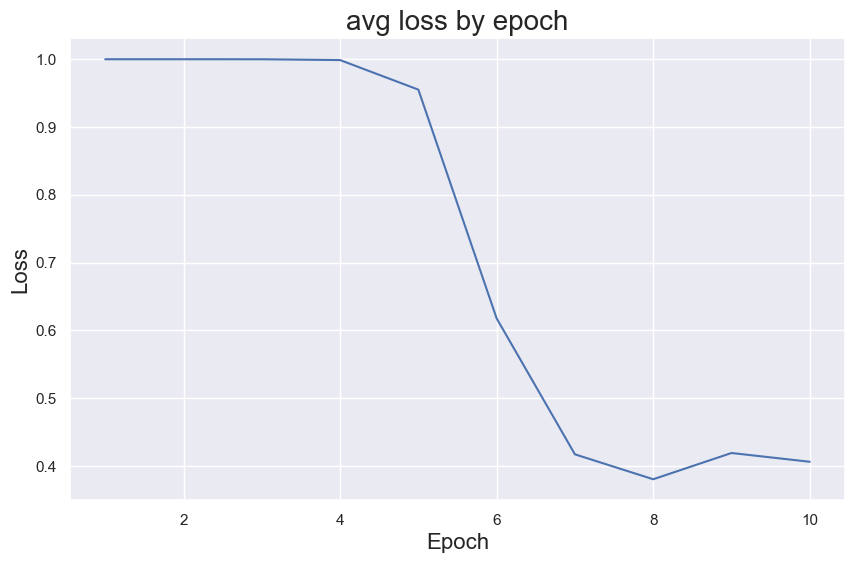

In [9]:
w1 , b1 , w2 , b2 , w_out , b_out , loss=train_ann(xtrain,ytrain)

## Testing models

In [59]:
def ann_pred(xtest , w1 , b1 , w2 , b2 , w_out , b_out):
    pred =[]
    for i in range(0 , xtest.shape[0]):
        x = xtest[i]
        
        #2. feed forward
        
        z1 = ReLu(np.dot(w1 , x) + b1) #hidden layer 1 output
        z2 = ReLu(np.dot(w2 , z1) + b2)#hidden layer 2 output
        y = Sigmoid(np.dot(w_out , z2) + b_out)#output of output layer
        
        pred.append(np.heaviside(y - 0.5,1)[0])
    return np.array(pred)  

In [60]:
predictions =ann_pred(xtest, w1 , b1 , w2 , b2 , w_out , b_out)

In [61]:
predictions.shape

(268,)

In [62]:
ytest = ytest.reshape(-1).astype(float)

In [63]:
ytest.shape

(268,)

## model evaluation

In [64]:
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(ytest , predictions)
df_cm = pd.DataFrame(cm , index = [dict_live[i] for i in range(0,2)],
                    columns = [dict_live[i] for i in range(0,2)])

In [65]:
cm

array([[119,  49],
       [ 16,  84]], dtype=int64)

In [66]:
df_cm

,died,survived
died,119,49
survived,16,84


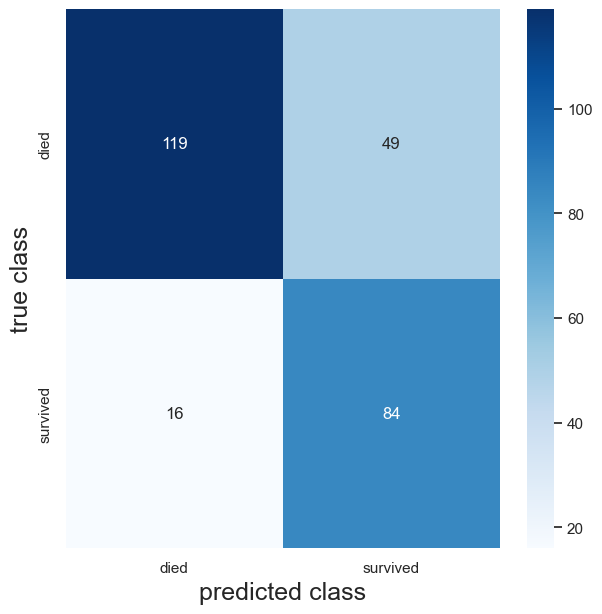

In [67]:
plt.figure(figsize = (7,7))
sns.heatmap(df_cm , annot = True , cmap = plt.cm.Blues , fmt = 'g')
plt.xlabel('predicted class' , fontsize = 18)
plt.ylabel('true class', fontsize = 18)
plt.show()